<a href="https://colab.research.google.com/github/Mhmdaris15/face_recognition_own/blob/main/face_recognition_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=2aae95cdfed6f527e470876f21c293668316e0aa0a3daf4aac15fb1372cd8df0
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget http://mydiba.me/wp-content/uploads/actors/Park-Hye-su.jpg -O known/parkhyesu.jpg
!wget https://api.duniagames.co.id/api/content/upload/file/19876251281578066786.jpg -O known/vanda.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/e/e4/Chelsea_Islan%2C_2019.jpg -O known/chelseaislan.jpg

--2021-05-05 22:32:21--  http://mydiba.me/wp-content/uploads/actors/Park-Hye-su.jpg
Resolving mydiba.me (mydiba.me)... 192.124.249.156, 2a02:fe80:1010::6:2
Connecting to mydiba.me (mydiba.me)|192.124.249.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216874 (212K) [image/jpeg]
Saving to: ‘known/parkhyesu.jpg’

known/parkhyesu.jpg 100%[===================>] 211.79K   496KB/s    in 0.4s    

2021-05-05 22:32:22 (496 KB/s) - ‘known/parkhyesu.jpg’ saved [216874/216874]

--2021-05-05 22:32:22--  https://api.duniagames.co.id/api/content/upload/file/19876251281578066786.jpg
Resolving api.duniagames.co.id (api.duniagames.co.id)... 104.18.93.107, 104.18.94.107, 2606:4700::6812:5d6b, ...
Connecting to api.duniagames.co.id (api.duniagames.co.id)|104.18.93.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44565 (44K) [image/jpeg]
Saving to: ‘known/vanda.jpg’

known/vanda.jpg     100%[===================>]  43.52K  --.-KB/s    in 0.006s  

2

In [3]:
!mkdir unknown
!wget https://wallpapercave.com/wp/wp2102679.jpg -O unknown/1.jpg
!wget https://kpoplat.com/wp-content/uploads/2020/11/park-shie.jpg -O unknown/2.jpg
!wget https://i.pinimg.com/originals/ef/a8/47/efa847e5d45b98c2bd6d631b96671c5a.jpg -O unknown/3.jpg
!wget https://www.celebritiesfrom.com/wp-content/uploads/2019/07/kim-so-hyun1.jpg -O unknown/4.jpg

--2021-05-05 22:32:28--  https://wallpapercave.com/wp/wp2102679.jpg
Resolving wallpapercave.com (wallpapercave.com)... 104.26.9.2, 172.67.71.70, 104.26.8.2, ...
Connecting to wallpapercave.com (wallpapercave.com)|104.26.9.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165175 (161K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>] 161.30K  --.-KB/s    in 0.07s   

2021-05-05 22:32:29 (2.42 MB/s) - ‘unknown/1.jpg’ saved [165175/165175]

--2021-05-05 22:32:29--  https://kpoplat.com/wp-content/uploads/2020/11/park-shie.jpg
Resolving kpoplat.com (kpoplat.com)... 172.67.213.99, 104.21.53.138, 2606:4700:3032::6815:358a, ...
Connecting to kpoplat.com (kpoplat.com)|172.67.213.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277043 (271K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 270.55K  --.-KB/s    in 0.1s    

2021-05-05 22:32:29 (1.79 MB/s) - ‘unknown/

In [4]:
# Import Library needed
import face_recognition
import os
import cv2
from google.colab.patches import cv2_imshow

In [9]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  weight = 500
  ratio = weight / float(w)
  height = int(h*ratio)
  final = cv2.resize(img, (weight, height))
  return final

In [18]:
import random

In [35]:
known_names = []
known_encoding = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encoding.append(img_enc)
  known_names.append(file.split('.')[0])

Processing 2.jpg
[True, True, False]
[0.41492034 0.55859647 0.72544775]
Index : 0 	Minimum Distance : 0.4149203353919676


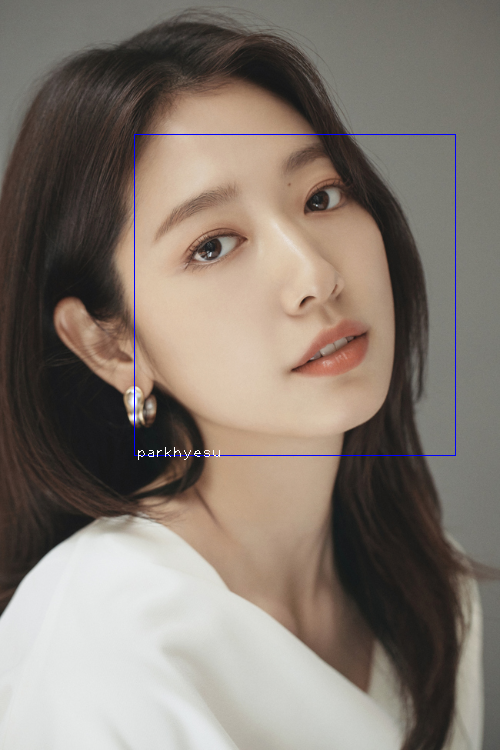

Processing 1.jpg
[False, False, True]
[0.61895109 0.66644342 0.44271049]
Index : 2 	Minimum Distance : 0.44271049466147055


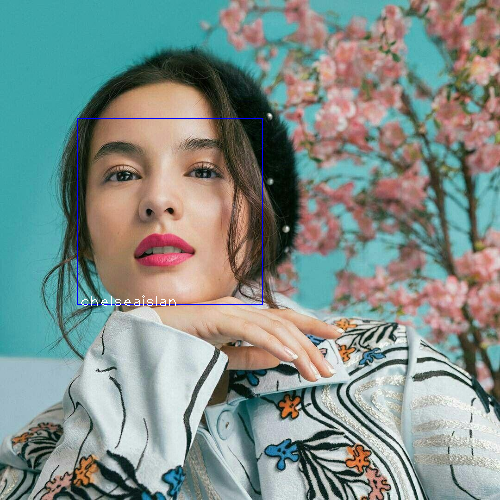

Processing 3.jpg
[True, True, False]
[0.58728663 0.49653629 0.73413529]
Index : 1 	Minimum Distance : 0.4965362919590082


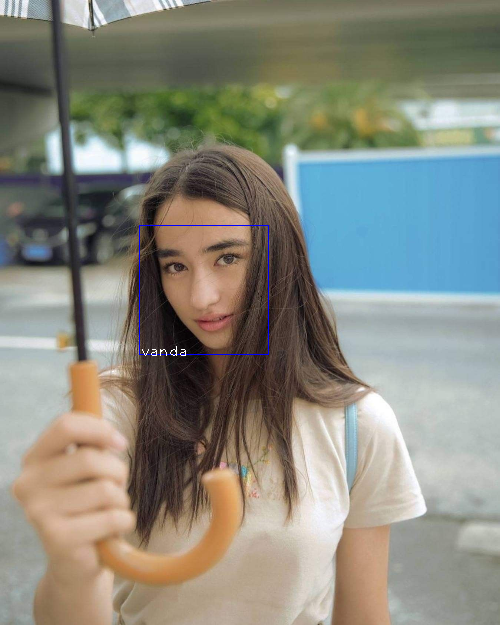

Processing 4.jpg
[True, False, False]
[0.52067469 0.62263699 0.70584238]
Index : 0 	Minimum Distance : 0.52067469027508


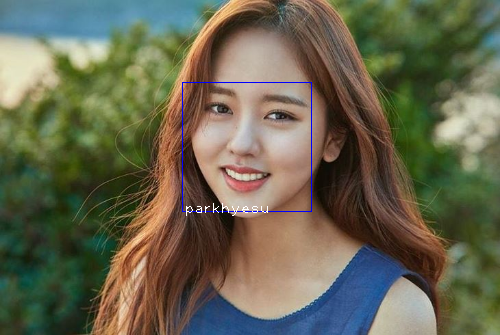

In [56]:
unknown_names = []
unknown_encoding = []
unknown_dir = 'unknown'

for f in os.listdir(unknown_dir):
  print('Processing', f)
  img = read_img(unknown_dir + '/' + f)
  img_enc = face_recognition.face_encodings(img)[0]

  result = face_recognition.compare_faces(known_encoding, img_enc)
  print(result)
  distance = face_recognition.face_distance(known_encoding, img_enc)
  print(distance)
  # print(distance.min())
  min_dist = distance[0]
  index = 0
  for i, dis in enumerate(distance):
    if dis < min_dist:
      min_dist = dis
      index = i
  print('Index :', index, '\tMinimum Distance :', min_dist)
  name = known_names[index]
  (t, r, b, l) = face_recognition.face_locations(img)[0]
  cv2.rectangle(img, (l,t), (r,b), (255,0,0), 1)
  cv2.putText(img, name, (l+2,b+2),cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1)
  cv2_imshow(img)

  # for i in range(len(result)):
  #   if result[i]:
  #     name = known_names[i]
  #     (t, r, b, l) = face_recognition.face_locations(img)[0]
  #     cv2.rectangle(img, (l,t), (r,b), (255,0,0), 1)
  #     cv2.putText(img, name, (l+2,b+2),cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1)
  #     cv2_imshow(img)
